#### Base Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

#### Data Load

In [2]:
# Load data from the sklearn datasets
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### Null Value Control

In [3]:
# Check if there are any Null values, because 
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

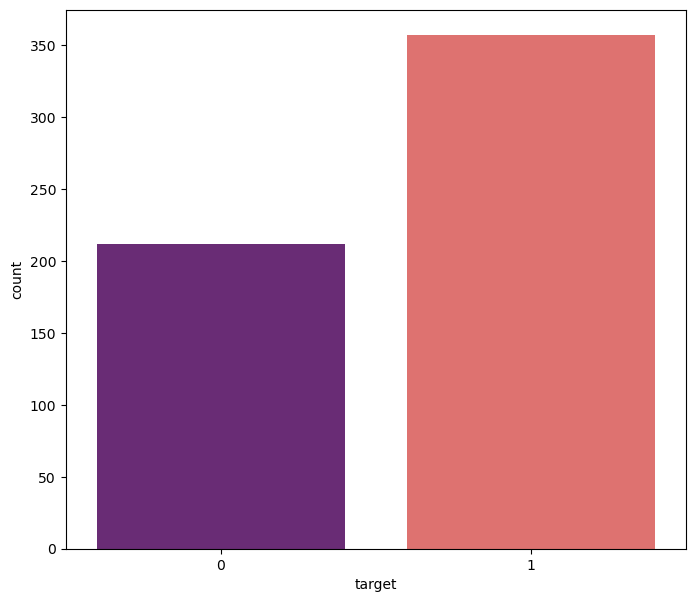

In [4]:
plt.figure(figsize = (8,7))
sns.countplot(x="target", hue="target", data=df, palette="magma", legend=False)

In [5]:
df_ = df.iloc[:,:-1]
dfy = df.iloc[:, -1]

#### Splitting and Scaling Data

In [6]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(df_, dfy, test_size = 0.2, random_state = 42)

In [7]:
# 
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

![Lojistik Regresyon Tek Noronlu NN Görseli](gorseller\perceptron.jpg)
Taken from DATAI Team Deep Learning Udemy Course

#### Initializing the weights and bias

In [8]:
# Identify the number of features (dimension) to initialize the weight matrix w with the correct shape.
dimension = x_train_scaled.shape[1]
dimension

30

In [9]:
# Initialize the weight and bias values
def intialize_w_b(dimension):
    w = np.full((dimension,), 0.01)
    b = 0
    return w, b

In [10]:
w , b = intialize_w_b(dimension)

In [11]:
print(f'x_train_scaled shape...: {x_train_scaled.shape}')
print(f'x_test_scaled shape...: {x_test_scaled.shape}')
print(f'y_train shape...: {y_train.shape}')
print(f'y_test shape...: {y_test.shape}')

x_train_scaled shape...: (455, 30)
x_test_scaled shape...: (114, 30)
y_train shape...: (455,)
y_test shape...: (114,)


In [12]:
def zed(w, x_train_scaled, b):
    z = x_train_scaled.dot(w) + b
    return z

In [13]:
z_tr = zed(w, x_train_scaled, b)

In [14]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [15]:
y_head = sigmoid(z_tr)
y_head = y_head.reshape(-1)
y_head.shape

(455,)

In [16]:
def forward_propagation(w,b, x_train_scaled, y_head):
    loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = np.sum(loss) / x_train_scaled.shape[0]
    return cost

In [17]:
cost = forward_propagation(w,b, x_train_scaled, y_head)
print(f'Cost Value...: {cost}')

Cost Value...: 0.6949844001196673


In [18]:
def back_propagation(x_train_scaled, y_train):
    dw = (x_train_scaled.T).dot(((y_head-y_train)))/x_train_scaled.shape[0] 
    db = np.sum(y_head-y_train)/x_train_scaled.shape[0] 
    #gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return dw, db

In [19]:
back_propagation(x_train_scaled, y_train)

(array([ 0.02605381, -0.00604854,  0.02742051,  0.02888889, -0.01977355,
         0.02044274,  0.0395879 ,  0.04573314, -0.01276596, -0.03049883,
         0.01558964, -0.02064539,  0.01446199,  0.01555066, -0.02264232,
        -0.00163174, -0.00037942, -0.00247258, -0.02559334, -0.00895618,
         0.03542324, -0.00288572,  0.03481295,  0.03193699, -0.01219212,
         0.02195093,  0.0291955 ,  0.04349479, -0.0023122 , -0.00358517]),
 -0.11060237343342817)

Epoch    0  Cost: 0.6950
Epoch  100  Cost: 0.2866
Epoch  200  Cost: 0.2208
Epoch  300  Cost: 0.1908
Epoch  400  Cost: 0.1724
Epoch  500  Cost: 0.1595
Epoch  600  Cost: 0.1498
Epoch  700  Cost: 0.1421
Epoch  800  Cost: 0.1358
Epoch  900  Cost: 0.1305


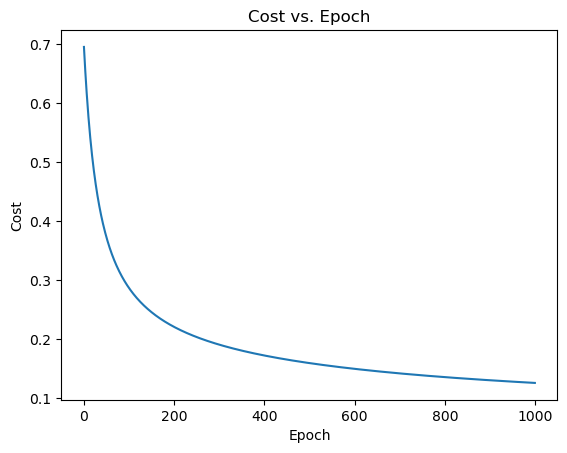

In [20]:
lr = 0.5
epochs = 1000
costs = []
for epoch in range(epochs):
    
    z = np.dot(x_train_scaled, w) + b
    y_head = sigmoid(z)
    
    # forward propagation :
    cost = forward_propagation(w,b, x_train_scaled, y_head)

    #back propagation:
    dw, db = back_propagation(x_train_scaled, y_train)


    #updating w and b :
    w -= lr * dw
    b -= lr * db

    costs.append(cost)
    
    # epochs watch :
    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d}  Cost: {cost:.4f}")


import matplotlib.pyplot as plt
plt.plot(range(epochs), costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs. Epoch')
plt.show()

    

In [21]:
# Eğitim bittikten sonra test setinde tahmin al:
z_test = x_test_scaled.dot(w) + b
y_head_test = sigmoid(z_test).reshape(-1)

#### **Manuel Model Results:**

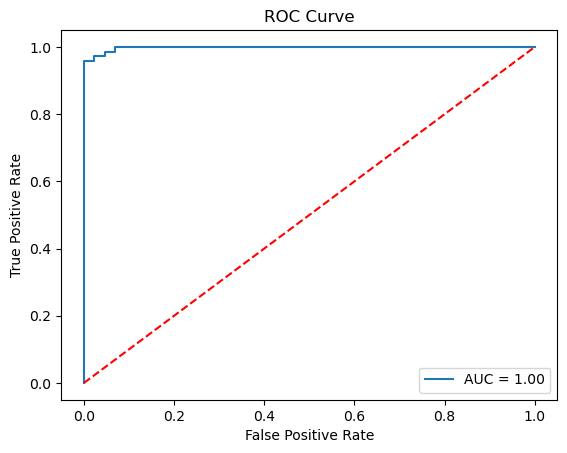

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_head_test)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [23]:
# I set the threshold value to 0.8. This is a bit high, but since the dataset involves cancer detection, 
# it's safer to choose a higher threshold to reduce false positives.
y_head_class = [1 if prob >= 0.4 else 0 for prob in y_head_test]

In [24]:
len(y_head_class)

114

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print(confusion_matrix(y_test, y_head_class))
print(classification_report(y_test, y_head_class))



[[40  3]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### **Sklearn Model Results:**

In [26]:
from sklearn import linear_model
l_model = linear_model
log_reg = linear_model.LogisticRegression(random_state = 42,max_iter= 200)

In [27]:
log_reg.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [28]:
y_pred_ = log_reg.predict(x_test_scaled)

In [29]:
y_probs = log_reg.predict_proba(x_test_scaled)[:, 1]  # Pozitif sınıfın olasılıkları


In [30]:
threshold = 0.4
y_pred_custom = (y_probs > threshold).astype(int)

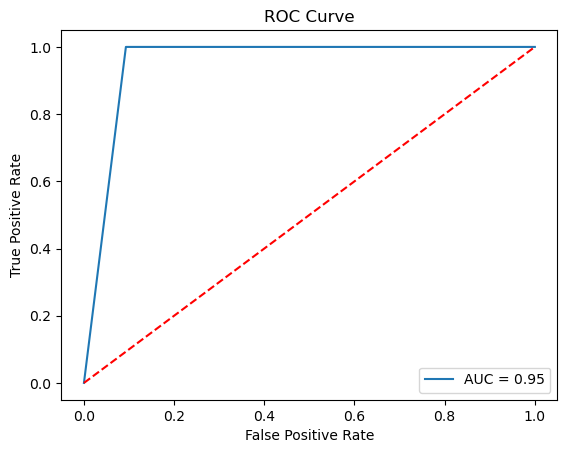

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_custom)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))


Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

[[39  4]
 [ 0 71]]


In [33]:
# If you would like to download your project's conda environment you can use the code below.
# If your work area is jupyter or Colab you should use "!" sign to access the command prompt,
# otherwise "!" sign is not required.
# code sample:
# !conda env export > environmentbreastCancer.yaml